***Classifying Multiple class of fruits***

In [ ]:
#done in collaboratory
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
#https://chaladze.com/l5/


--2024-04-25 18:38:31--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M   116MB/s    in 0.9s    

2024-04-25 18:38:34 (116 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip
#!unzip Linnaeus.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

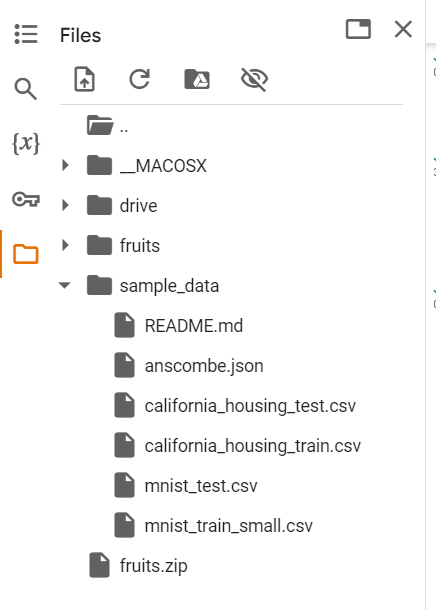

In [ ]:
img_height, img_width = 32,32
batch_size=20
train_ds= tf.keras.utils.image_dataset_from_directory('/content/fruits/train' ,
                                                     image_size=(img_height, img_width),
                                                      batch_size= batch_size)

Found 460 files belonging to 3 classes.


In [ ]:
img_height, img_width = 32,32
batch_size=20
test_ds= tf.keras.utils.image_dataset_from_directory('/content/fruits/test' ,
                                                     image_size=(img_height, img_width),
                                                      batch_size= batch_size)

Found 130 files belonging to 3 classes.


In [ ]:
img_height, img_width = 32,32
batch_size=20
validation_ds= tf.keras.utils.image_dataset_from_directory('/content/fruits/validation' ,
                                                     image_size=(img_height, img_width),
                                                      batch_size= batch_size)

Found 66 files belonging to 3 classes.


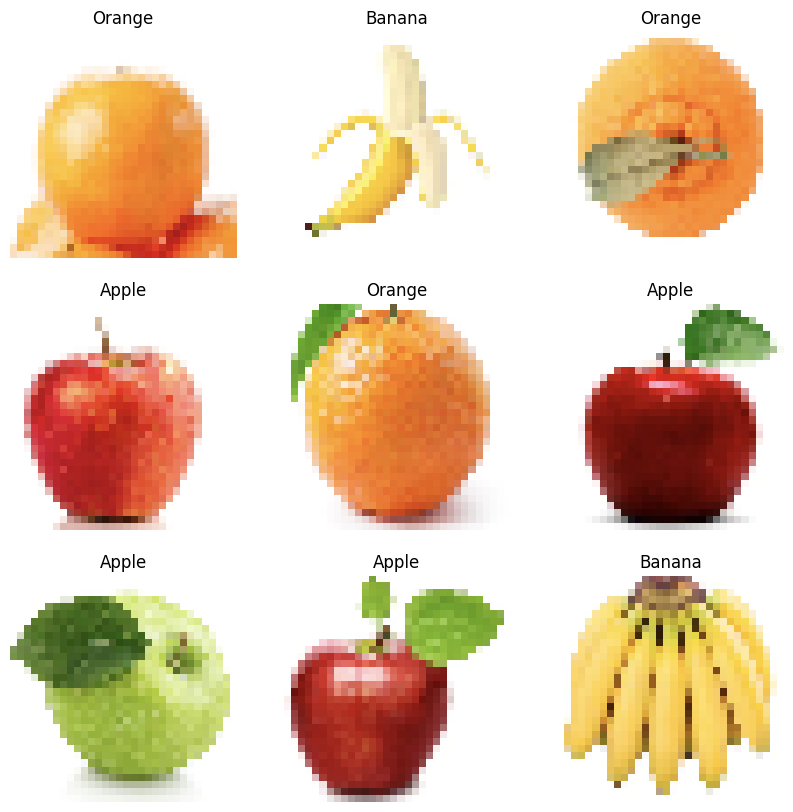

In [ ]:
classnames=['Apple', 'Banana', 'Orange']
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis('off')

In [ ]:
#creating Neural Network


In [ ]:
model= tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),

                            tf.keras.layers.Conv2D(32,3,activation='relu'),
                            tf.keras.layers.MaxPooling2D(),

                            tf.keras.layers.Conv2D(32,3,activation='relu'),
                            tf.keras.layers.MaxPooling2D(),

                            tf.keras.layers.Conv2D(32,3,activation='relu'),
                            tf.keras.layers.MaxPooling2D(),

                            tf.keras.layers.Flatten(),

                            tf.keras.layers.Dense(128,activation='softmax'),
                            tf.keras.layers.Dense(3)


])

In [ ]:
model.compile(optimizer='rmsprop', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

In [ ]:
model.fit(train_ds, validation_data= validation_ds, epochs= 20)

Epoch 1/20
23/23 [==============================] - 4s 84ms/step - loss: 0.5267 - accuracy: 0.9652 - val_loss: 0.5101 - val_accuracy: 0.9697
Epoch 2/20
23/23 [==============================] - 3s 94ms/step - loss: 0.5105 - accuracy: 0.9630 - val_loss: 0.4997 - val_accuracy: 0.9697
Epoch 3/20
23/23 [==============================] - 4s 109ms/step - loss: 0.4915 - accuracy: 0.9717 - val_loss: 0.4648 - val_accuracy: 0.9697
Epoch 4/20
23/23 [==============================] - 5s 165ms/step - loss: 0.4902 - accuracy: 0.9587 - val_loss: 0.5001 - val_accuracy: 0.9394
Epoch 5/20
23/23 [==============================] - 2s 72ms/step - loss: 0.4638 - accuracy: 0.9674 - val_loss: 0.4283 - val_accuracy: 1.0000
Epoch 6/20
23/23 [==============================] - 3s 104ms/step - loss: 0.4587 - accuracy: 0.9609 - val_loss: 0.4521 - val_accuracy: 0.9697
Epoch 7/20
23/23 [==============================] - 2s 78ms/step - loss: 0.4382 - accuracy: 0.9696 - val_loss: 0.4265 - val_accuracy: 0.9697
Epoch 8/20

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 16ms/step - loss: 0.3137 - accuracy: 0.9615


[0.3137337863445282, 0.9615384340286255]

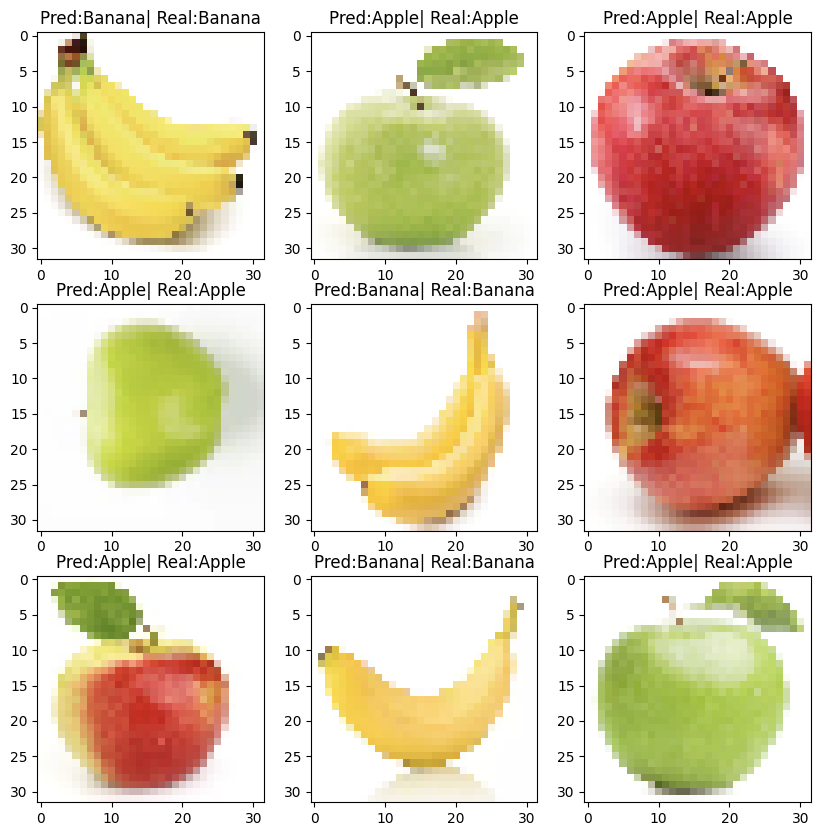

In [ ]:
import numpy as np
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classification = model(images)

for i in range(9):
  ax= plt.subplot(3,3,i+1)
  plt.imshow(images[i].numpy().astype("uint8"))
  index = np.argmax(classification[i])
  plt.title("Pred:"+ classnames[index]+"| Real:"+classnames[labels[i]])

In [ ]:
converter= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= converter.convert()
with open("model.tflite","wb") as f:
  f.write(tflite_model)


In [ ]:
pwd

'/content'

In [ ]:
# once file is created it will look like following snip:


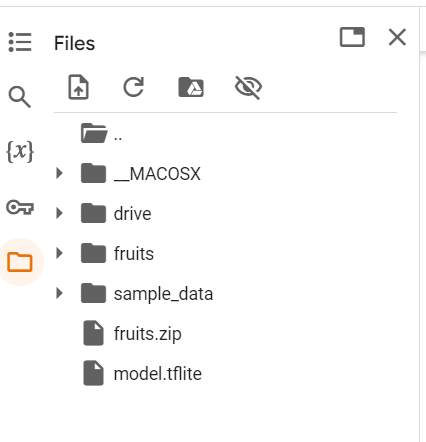